In [29]:
from fastai.vision import *
import pose
%load_ext autoreload
%autoreload 2

import sys
sys.path[-1] = str(Path().resolve().parent)
sys.path


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


['/home/labs/waic/omrik/csPose/notebooks',
 '/home/labs/waic/omrik/.conda/envs/fastai/lib/python37.zip',
 '/home/labs/waic/omrik/.conda/envs/fastai/lib/python3.7',
 '/home/labs/waic/omrik/.conda/envs/fastai/lib/python3.7/lib-dynload',
 '',
 '/home/labs/waic/omrik/.conda/envs/fastai/lib/python3.7/site-packages',
 '/home/labs/waic/omrik/.conda/envs/fastai/lib/python3.7/site-packages/IPython/extensions',
 '/home/labs/waic/omrik/.ipython',
 '/home/labs/waic/omrik/csPose']

In [20]:
root = Path('../../LIP').resolve()
root

PosixPath('/home/labs/waic/omrik/LIP')

In [22]:
transforms = [pose.pose_flip_lr(p=0.5)], None
data = (pose.PoseItemList.from_folder(root)
        .split_by_folder('train_images', 'val_images')
        .label_from_func(pose.LIPLabel(root /'pose_annotations'))
        .transform(transforms, tfm_y=True, size=128, resize_method=ResizeMethod.PAD, padding_mode='zeros')
        .databunch(bs=16)
        .normalize(imagenet_stats))

data

ImageDataBunch;

Train: LabelList (30462 items)
x: PoseItemList
Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128)
y: PoseLabelList
Pose (8/16) (128, 128),Pose (7/16) (128, 128),Pose (6/16) (128, 128),Pose (14/16) (128, 128),Pose (1/16) (128, 128)
Path: /home/labs/waic/omrik/LIP;

Valid: LabelList (10000 items)
x: PoseItemList
Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128)
y: PoseLabelList
Pose (14/16) (128, 128),Pose (16/16) (128, 128),Pose (10/16) (128, 128),Pose (16/16) (128, 128),Pose (10/16) (128, 128)
Path: /home/labs/waic/omrik/LIP;

Test: None

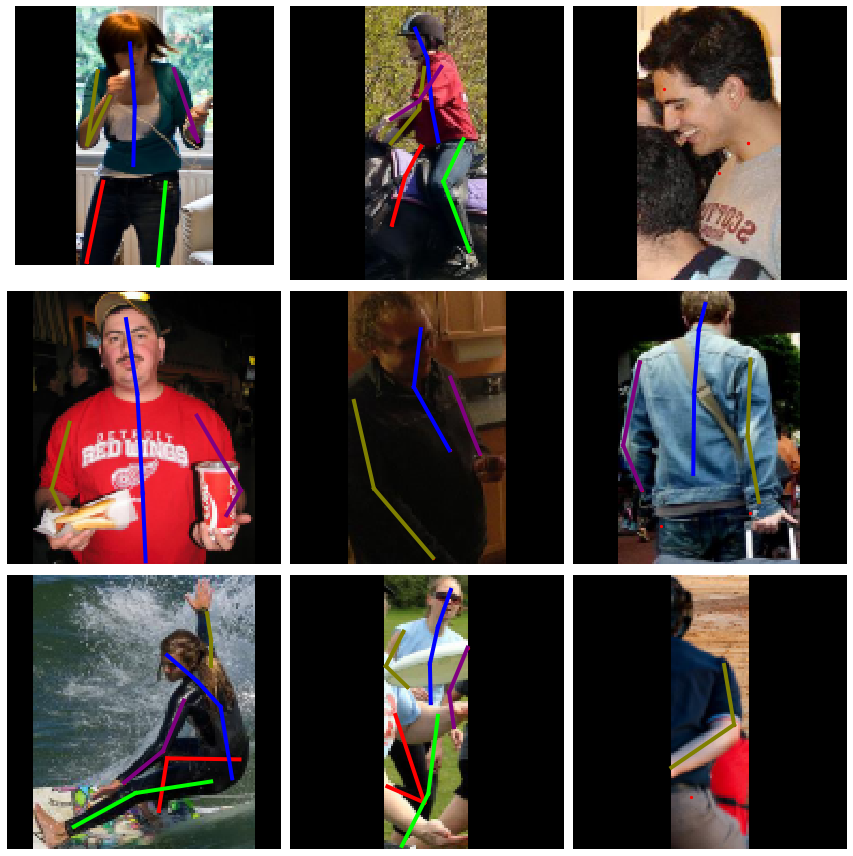

In [25]:
data.show_batch(rows=3,)

In [30]:
learner = cnn_learner(data, models.resnet18, loss_func=pose.PoseLoss(MSELossFlat()), callback_fns=pose.Pckh)

In [31]:
learner.lr_find()

epoch,train_loss,valid_loss,Head,Shoulder,Elbow,Wrist,Hip,Knee,Ankle,UBody,Total,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


Min numerical gradient: 6.31E-07
Min loss divided by 10: 1.00E-02


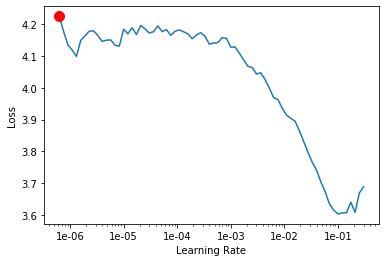

In [33]:
learner.recorder.plot(suggestion=True)

In [36]:
learner.fit_one_cycle(2, 1e-2)


epoch,train_loss,valid_loss,Head,Shoulder,Elbow,Wrist,Hip,Knee,Ankle,UBody,Total,time
0,0.075953,0.050542,0.582475,0.372344,0.170450,0.107082,0.252785,0.117466,0.171438,0.313767,0.264709,01:28
1,0.062971,0.041479,0.629353,0.466870,0.265806,0.147339,0.313997,0.238083,0.226545,0.383030,0.337728,01:25


In [37]:
learner.fit_one_cycle(3, 1e-2)

epoch,train_loss,valid_loss,Head,Shoulder,Elbow,Wrist,Hip,Knee,Ankle,UBody,Total,time
0,0.082648,0.180207,0.420462,0.346738,0.199750,0.115364,0.184351,0.162841,0.158693,0.274341,0.234458,01:29
1,0.066444,7.504973,0.492324,0.314444,0.166630,0.128748,0.205236,0.192995,0.184728,0.279830,0.247511,01:05
2,0.057138,0.058533,0.643210,0.501489,0.294571,0.157932,0.334441,0.242560,0.232222,0.405081,0.355577,01:13


In [38]:
learner.unfreeze()

In [39]:
learner.lr_find()

epoch,train_loss,valid_loss,Head,Shoulder,Elbow,Wrist,Hip,Knee,Ankle,UBody,Total,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


Min numerical gradient: 6.31E-07
Min loss divided by 10: 4.79E-07


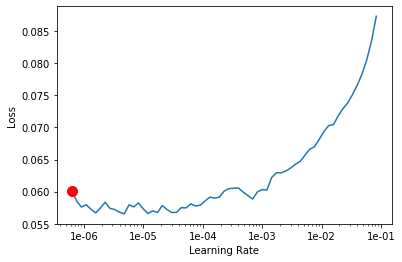

In [40]:
learner.recorder.plot(suggestion=True)

In [42]:
learner.fit_one_cycle(5, slice(5e-5, 1e-2/5))

epoch,train_loss,valid_loss,Head,Shoulder,Elbow,Wrist,Hip,Knee,Ankle,UBody,Total,time
0,0.060281,0.044468,0.579281,0.477431,0.278203,0.154240,0.290476,0.242111,0.223277,0.377528,0.330946,02:41
1,0.056974,0.038961,0.587884,0.509700,0.342878,0.184212,0.361575,0.252714,0.243231,0.410997,0.365771,01:33
2,0.049682,0.035010,0.701422,0.562653,0.348034,0.214504,0.390499,0.292735,0.284631,0.462537,0.411374,01:26
3,0.045257,0.031902,0.763909,0.617408,0.385536,0.226517,0.434711,0.315435,0.295683,0.504795,0.448151,01:51
4,0.045355,0.030670,0.751494,0.625287,0.399783,0.239470,0.443606,0.317169,0.286711,0.510177,0.452073,01:59


In [43]:
learner.fit_one_cycle(5, slice(5e-5, 1e-2/5))

epoch,train_loss,valid_loss,Head,Shoulder,Elbow,Wrist,Hip,Knee,Ankle,UBody,Total,time
0,0.049057,0.032381,0.727437,0.608339,0.388281,0.218516,0.423222,0.303681,0.289103,0.491826,0.436243,02:23
1,0.047844,0.034909,0.706779,0.604469,0.390041,0.237973,0.409809,0.288298,0.290716,0.490531,0.431653,01:26
2,0.047991,0.032479,0.728209,0.589831,0.373843,0.257294,0.452554,0.295276,0.274348,0.493015,0.438790,01:22
3,0.040110,0.029397,0.752164,0.635555,0.435301,0.274724,0.466451,0.333099,0.302643,0.530171,0.471554,01:24
4,0.036633,0.029170,0.758036,0.639794,0.429212,0.288230,0.467262,0.348896,0.307489,0.534485,0.476844,01:27


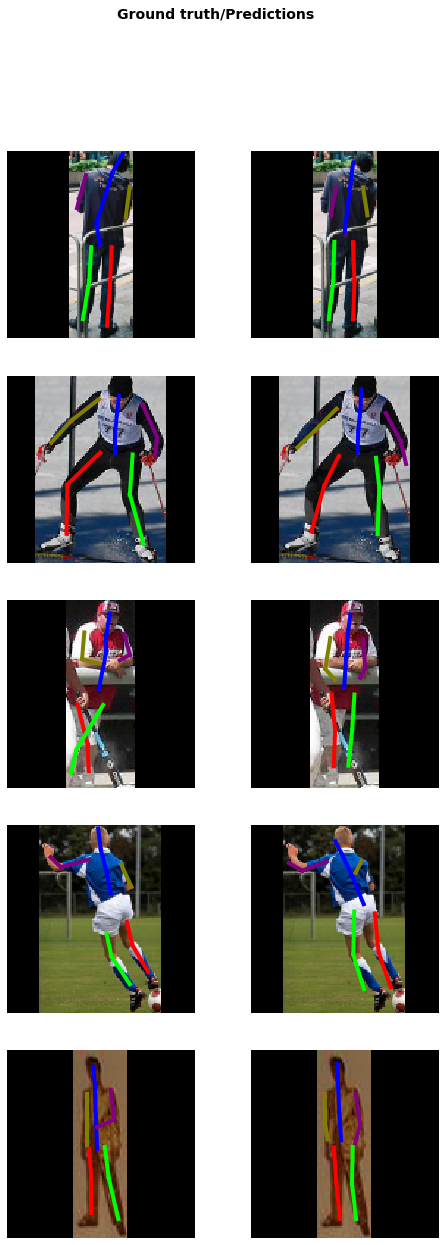

In [48]:
data.valid_dl = data.valid_dl.new(shuffle=True)
learner.show_results()

In [45]:
learner.opt

OptimWrapper over Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.95, 0.99)
    eps: 1e-08
    lr: 2e-10
    weight_decay: 0

Parameter Group 1
    amsgrad: False
    betas: (0.95, 0.99)
    eps: 1e-08
    lr: 2e-10
    weight_decay: 0

Parameter Group 2
    amsgrad: False
    betas: (0.95, 0.99)
    eps: 1e-08
    lr: 1.264911064067352e-09
    weight_decay: 0

Parameter Group 3
    amsgrad: False
    betas: (0.95, 0.99)
    eps: 1e-08
    lr: 1.264911064067352e-09
    weight_decay: 0

Parameter Group 4
    amsgrad: False
    betas: (0.95, 0.99)
    eps: 1e-08
    lr: 8.000000000000002e-09
    weight_decay: 0

Parameter Group 5
    amsgrad: False
    betas: (0.95, 0.99)
    eps: 1e-08
    lr: 8.000000000000002e-09
    weight_decay: 0
).
True weight decay: True